In [19]:
import pandas as pd
import seaborn as sns
import plotly.express as px

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.manifold import TSNE

### Carregar os Dados

In [20]:
df_cosmeticos = pd.read_csv('.\dataset\cosmeticos.csv')

<>:1: SyntaxWarning:

invalid escape sequence '\d'

<>:1: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\Carolina\AppData\Local\Temp\ipykernel_5464\932786249.py:1: SyntaxWarning:

invalid escape sequence '\d'



In [21]:
df_cosmeticos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           1472 non-null   object 
 1   Marca          1472 non-null   object 
 2   Nome           1472 non-null   object 
 3   Preco          1472 non-null   int64  
 4   Rating         1472 non-null   float64
 5   Ingredientes   1472 non-null   object 
 6   Pele_Mista     1472 non-null   int64  
 7   Pele_Seca      1472 non-null   int64  
 8   Pele_Normal    1472 non-null   int64  
 9   Pele_Oleosa    1472 non-null   int64  
 10  Pele_Sensivel  1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [22]:
df_cosmeticos.head(5)

,Tipo,Marca,Nome,Preco,Rating,Ingredientes,Pele_Mista,Pele_Seca,Pele_Normal,Pele_Oleosa,Pele_Sensivel
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


### EDA

#### Transformar valores da coluna "Ingredientes" em um novo DataFrame

In [23]:
df_cosmeticos_eda = df_cosmeticos.copy()
df_cosmeticos_eda = df_cosmeticos_eda['Ingredientes'].str.split(',')

In [24]:
df_cosmeticos_eda

0       [Algae (Seaweed) Extract,  Mineral Oil,  Petro...
1       [Galactomyces Ferment Filtrate (Pitera),  Buty...
2       [Water,  Dicaprylyl Carbonate,  Glycerin,  Cet...
3       [Algae (Seaweed) Extract,  Cyclopentasiloxane,...
4       [Water,  Snail Secretion Filtrate,  Phenyl Tri...
                              ...                        
1467    [Water,  Alcohol Denat.,  Potassium Cetyl Phos...
1468    [Water,  Isododecane,  Dimethicone,  Butylocty...
1469    [Water,  Dihydroxyacetone,  Glycerin,  Scleroc...
1470    [Water,  Dihydroxyacetone,  Propylene Glycol, ...
1471                      [Visit the DERMAFLASH boutique]
Name: Ingredientes, Length: 1472, dtype: object

In [25]:
df_ingredientes = df_cosmeticos_eda.explode('Ingredientes')

In [26]:
df_ingredientes

0              Algae (Seaweed) Extract
1                          Mineral Oil
2                           Petrolatum
3                             Glycerin
4                        Isohexadecane
                     ...              
45811           Alpha-isomethyl Ionone
45812                 CI 14700 (Red 4)
45813              CI 19140 (Yellow 5)
45814               CI 42090 (Blue 1).
45815    Visit the DERMAFLASH boutique
Name: Ingredientes, Length: 45816, dtype: object

#### Análise Univariada

In [27]:
df_cosmeticos.describe()

,Preco,Rating,Pele_Mista,Pele_Seca,Pele_Normal,Pele_Oleosa,Pele_Sensivel
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [28]:
# Distribuição da Variável Tipo
percentual_tipo = df_cosmeticos.value_counts('Tipo') / len(df_cosmeticos) * 100
percentual_tipo = percentual_tipo.reset_index() # Voltando dados para o DataFrame
percentual_tipo.columns = ['Tipo', 'Percentual']
fig = px.bar(percentual_tipo, x='Tipo', y='Percentual', color='Tipo', text='Percentual')

# Atualizando o Plot para melhor visualizar as Labels
fig.update_traces(texttemplate='%{text:.4s}%', textposition='outside')
fig.show()

In [29]:
len(df_cosmeticos['Marca'].unique())

116

In [30]:
percentual_marca = df_cosmeticos.value_counts('Marca') / len(df_cosmeticos) * 100
percentual_marca = percentual_marca.reset_index()
percentual_marca.columns = ['Marca', 'Percentual']
fig = px.bar(percentual_marca.head(10), x='Percentual', y='Marca', color='Marca', orientation='h', text='Percentual')

fig.update_traces(texttemplate='%{text:.4s}%', textposition='outside')

fig.show()

In [31]:
percentual_ingrediente = df_ingredientes.value_counts('Ingredientes') / len(df_ingredientes) * 100
percentual_ingrediente = percentual_ingrediente.reset_index()
percentual_ingrediente.columns = ['Ingredientes', 'Percentual']
fig = px.bar(percentual_ingrediente.head(10), x='Percentual', y='Ingredientes', color='Ingredientes', orientation='h', text='Percentual')

fig.update_traces(texttemplate='%{text:.4s}%', textposition='outside')

fig.show()

In [32]:
len(percentual_ingrediente['Ingredientes'].unique())

7298

In [33]:
# Distribuição da Variável Preço
px.histogram(df_cosmeticos['Preco'], title='Histograma da Variável Preço')

In [34]:
px.histogram(df_cosmeticos['Rating'], title='Histograma da Variável Rating')

#### Análise Bivariada

In [35]:
px.box(df_cosmeticos, x='Preco', y='Tipo', color='Tipo', orientation='h', hover_data=['Marca', 'Nome'])

In [36]:
px.box(df_cosmeticos, x='Rating', y='Tipo', orientation='h', hover_data=['Marca', 'Nome'], color='Tipo')

In [37]:
px.scatter(df_cosmeticos, x='Preco', y='Rating', color='Tipo', hover_data=['Marca'])

<Axes: >

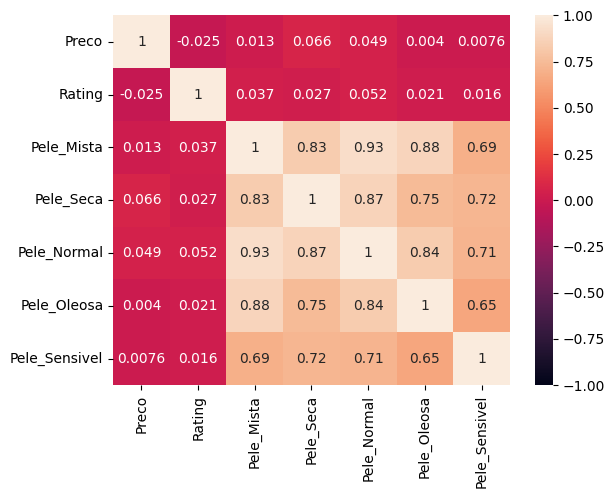

In [38]:
# Gerar Matriz de Correlação
matriz_corr_cosmeticos = df_cosmeticos.corr(numeric_only=True)
sns.heatmap(matriz_corr_cosmeticos, vmin=-1, vmax=1, annot=True)

### Treinamento do Algoritmo t-SNE

In [39]:
# Copiar DataFrame Original
X = df_cosmeticos.copy()
X.drop(columns=['Nome', 'Ingredientes'], axis=1, inplace=True)


In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           1472 non-null   object 
 1   Marca          1472 non-null   object 
 2   Preco          1472 non-null   int64  
 3   Rating         1472 non-null   float64
 4   Pele_Mista     1472 non-null   int64  
 5   Pele_Seca      1472 non-null   int64  
 6   Pele_Normal    1472 non-null   int64  
 7   Pele_Oleosa    1472 non-null   int64  
 8   Pele_Sensivel  1472 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 103.6+ KB


In [41]:
numeric_features = ['Preco', 'Rating']
categorical_features = ['Marca', 'Tipo']


In [42]:
numeric_tranformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_tranformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

In [43]:
X_transformed = preprocessor.fit_transform(X)


In [44]:
# Armazenar resultados do t-SNE em DataFrame
df_results = pd.DataFrame()


In [45]:
# Loop de Treinamento do Algoritmo, mudando o parâmetro de Perplexity
for perplexity in range(5, 51, 1):

    # Criar e Treinar Modelo
    tsne = TSNE(n_components=2, perplexity=perplexity, init="random", n_iter=250, random_state=510)
    tsne_results = tsne.fit_transform(X_transformed)

    # Armazenar Resultados
    temp_df = pd.DataFrame(tsne_results, columns=['Componente 1', 'Componente 2'])
    temp_df['Perplexity'] = perplexity 
    df_results = pd.concat([df_results, temp_df], axis=0)

c:\Users\Carolina\.virtualenvs\reducao_dimencionalidade_tSNE-7gVf6Ynm\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

c:\Users\Carolina\.virtualenvs\reducao_dimencionalidade_tSNE-7gVf6Ynm\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

c:\Users\Carolina\.virtualenvs\reducao_dimencionalidade_tSNE-7gVf6Ynm\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

c:\Users\Carolina\.virtualenvs\reducao_dimencionalidade_tSNE-7gVf6Ynm\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

c:\Users\Carolina\.virtualenvs\reducao_dimencionalidade_tSNE-7gVf6Ynm\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:


In [46]:
df_results.head(10)

,Componente 1,Componente 2,Perplexity
0,2.017179,-1.210793,5
1,2.121076,-1.234012,5
2,0.806265,-0.790785,5
3,2.024548,-1.200891,5
4,0.677299,-0.484866,5
5,1.314893,-0.897693,5
6,0.803311,-0.778571,5
7,0.807667,-0.795009,5
8,0.663522,-0.467112,5
9,2.804010,-0.862005,5


In [47]:
# Reset no Indice para realizar o Plot
df_results.reset_index(drop=True, inplace=True)

### Visualizar Resultados

In [48]:
# Criar um ScatterPlot Animado com variação no Perplexity
fig = px.scatter(df_results, x='Componente 1', y='Componente 2', animation_frame='Perplexity', 
                 title='Visualização do t-SNE com variação do Perplexity')

fig.show()

### Visualização em 3D dos Resultados

In [50]:
results_df = pd.DataFrame()

In [52]:
# Loop de Treinamento do Algoritmo, mudando o parâmetro de Perplexity
for perplexity in range(5, 51, 1):

    # Criar e Treinar Modelo
    tsne = TSNE(n_components=3, perplexity=perplexity, init="random", n_iter=250, random_state=510)
    tsne_results = tsne.fit_transform(X_transformed)

    # Armazenar Resultados
    temp_df = pd.DataFrame(tsne_results, columns=['Componente 1', 'Componente 2', 'Componente 3'])
    temp_df['Perplexity'] = perplexity 
    results_df = pd.concat([results_df, temp_df], axis=0)

c:\Users\Carolina\.virtualenvs\reducao_dimencionalidade_tSNE-7gVf6Ynm\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

c:\Users\Carolina\.virtualenvs\reducao_dimencionalidade_tSNE-7gVf6Ynm\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

c:\Users\Carolina\.virtualenvs\reducao_dimencionalidade_tSNE-7gVf6Ynm\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

c:\Users\Carolina\.virtualenvs\reducao_dimencionalidade_tSNE-7gVf6Ynm\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

c:\Users\Carolina\.virtualenvs\reducao_dimencionalidade_tSNE-7gVf6Ynm\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:


In [53]:
results_df.reset_index(drop=True, inplace=True)

In [55]:
# Criar um ScatterPlot Animado com variação no Perplexity
fig = px.scatter_3d(results_df, x='Componente 1', y='Componente 2', z='Componente 3', animation_frame='Perplexity', 
                 title='Visualização do t-SNE com variação do Perplexity')

fig.show()